# Simple Linear Regression

In this post we shall be implementing Simple Linear Regression from Scratch in Python. Later we shall see how to use scikit-learn library for the same.

## VIDEO :

In [1]:
from IPython.display import HTML,IFrame
url1 = 'https://drive.google.com/file/d/'
url2 = '/preview'
id = '14c7IfkmpcNHEaw0FmCL03KqfO-DsBa7H'
url =url1+id+url2
IFrame(url,width="600",height="400")

## Where can Linear Regression be used? 

It is mostly used where we want to predict continuous data. In Linear Regression we build a model which predicts the line that best fits the data. Similar to image below:
![Regression](img/01_reg_line.png)

## What is Linear Regression
The objective of a linear regression model is to find a relationship between one or more features(independent variables) and a continuous target variable(dependent variable). When there is only feature it is called Uni-variate Linear Regression and if there are multiple features, it is called Multiple Linear Regression.

## Hypothesis of Linear Regression

The linear regression model can be represented by the following equation:

![Hypothesis](img/02_hyp.png)

- Y is the predicted value
- θ₀ is the bias term.
- θ₁,…,θₙ are the model parameters
- x₁, x₂,…,xₙ are the feature values.
- The above hypothesis can also be represented by

![Hypothesis Vector](img/03_hyp2.png)

where
- θ is the model’s parameter vector including the bias term θ₀
- x is the feature vector with x₀ =1

## Generate DataSet

In [1]:
# imports
import numpy as np

# generate random data-set
np.random.seed(0)
x = np.random.rand(100, 1)
y = 2 + 3 * x + np.random.rand(100, 1)

In [2]:
# plot it
import matplotlib.pyplot as plt
plt.scatter(x,y,s=10)
plt.xlabel('x')
plt.ylabel('y')

Text(0, 0.5, 'y')

## Training a Linear Regression Model
Training of the model here means to find the parameters so that the model best fits the data.

<b><i>How do we determine the best fit line?</b></i>

The line for which the the error between the predicted values and the observed values is minimum is called the best fit line or the regression line. These errors are also called as residuals. The residuals can be visualized by the vertical lines from the observed data value to the regression line.
![Error Line](img/04_error_line.png)

To define and measure the error of our model we define the cost function as the sum of the squares of the residuals. The cost function is denoted by

![Cost](img/05_cost.png)

where the hypothesis function h(x) is denoted by

![Hypothesis0](img/06_hyp.png)

and m is the total number of training examples in our data-set.

Our objective is to find the model parameters so that the cost function is minimum. We will use Gradient Descent to find this.

## Gradient Descent

Gradient descent is a generic optimization algorithm used in many machine learning algorithms. It iteratively tweaks the parameters of the model in order to minimize the cost function. The steps of gradient descent is outlined below.

1. We first initialize the model parameters with some random values. This is also called as random initialization.
2. Now we need to measure how the cost function changes with change in it’s parameters. Therefore we compute the partial derivatives of the cost function w.r.t to the parameters θ₀, θ₁, … , θₙ

![Partialderivative 1](img/07.png)


![Partial der 2](img/08.png)


similarly, the partial derivative of the cost function w.r.t to any parameter can be denoted by

![Partial der cost](img/09.png)

We can compute the partial derivatives for all parameters at once using

![](img/10.png)

3. After computing the derivative we update the parameters as given below
![](img/11.png)
where α is the learning parameter.

We can update all the parameters at once using,
![](img/12.png)

We repeat the steps 2,3 until the cost function converges to the minimum value. If the value of α is too small, the cost function takes larger time to converge. If α is too large, gradient descent may overshoot the minimum and may finally fail to converge.

![](img/13.png)

When the learning rate is very slow, the gradient descent takes larger time to find the best fit line.

![](img/14.gif)

When the learning rate is normal
![](img/15.gif)

When learning rate is high, gradient descent algorithm keeps overshooting the best fit line and may even fail to find the best line.
![](img/16.gif)

## Implementation

In [3]:
# Creating LinearRegression Class

class LinearRegression:
    
    # Constructor
    def __init__(self, alpha=0.05, iterations=1000):
        self.alpha = alpha
        self.iter = iterations
        
    # Fit the model
    # x: (no_samples, no_features)
    # y: (no_samples, no_target_values)
    def fit(self, x, y):
      
        # Save cost history
        self.cost = []
        
        # Initialize weights (no_features, 1)
        self.wt = np.zeros((x.shape[1],1))
        
        # no_samples
        m = y.shape[0]
        
        # Calculate cost and gradient
        for _ in range(self.iter):
            
            y_pred = np.dot(x, self.wt)
            error = y_pred - y
            gradient_vector = np.dot(x.T, error)
            
            # update weight
            self.wt -= (self.alpha / m) * gradient_vector
            
            # MSE
            cost = np.sum((error ** 2)) / (2 * m)
            self.cost.append(cost)
            
        return self
    
    # Predict Value
    def predict(self, x):
        
        return np.dot(x, self.wt)

In [4]:
# Performance Metric
def RMSE(y_actual, y_predict):
    
    sum_of_sq_error = np.sum((y_actual - y_predict) ** 2)
    return np.sqrt(sum_of_sq_error)

In [5]:
# data
np.random.seed(0)
x = np.random.rand(100, 1)
y = 2 + 3 * x + np.random.rand(100, 1)

In [6]:
print(x.shape,y.shape)

(100, 1) (100, 1)


In [7]:
'''
np_c: slice objects to concatenation along the second axis.

This is short-hand for ``np.r_['-1,2,0', index expression]``, which is
useful because of its common occurrence. In particular, arrays will be
stacked along their last axis after being upgraded to at least 2-D with
1's post-pended to the shape (column vectors made out of 1-D arrays).

For detailed documentation, see `r_`.

Examples
--------
>>> np.c_[np.array([[1,2,3]]), 0, 0, np.array([[4,5,6]])]
array([[1, 2, 3, 0, 0, 4, 5, 6]])
'''
m = x.shape[0]
# add coeff term to x
x_train = np.c_[np.ones((m, 1)), x]
lr_model = LinearRegression()
lr_model.fit(x_train,y)

In [8]:
predicted_values = lr_model.predict(x_train)

In [9]:
# Model param
intercept, coeffs = lr_model.wt
cost_history = lr_model.cost

In [10]:
print("Intercept: {}, Coefficient {}".format(intercept, coeffs))

Intercept: [2.58109277], Coefficient [2.89114079]


In [11]:
def scatter_plot(x, y, size=10, x_label='x', y_label='y', color='b'):
    plt.scatter(x, y, s=size, color=color)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

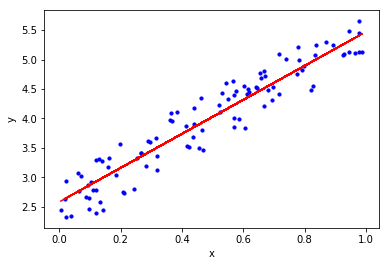

In [12]:
# plotting
scatter_plot(x, y)
plt.plot(x, predicted_values,color='r')

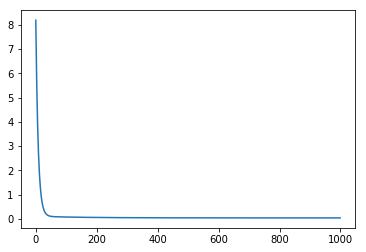

In [13]:
# Plotting Cost
plt.plot(cost_history)

In [14]:
# Evaluation
rmse = RMSE(y, predicted_values)/m
print("RMSE: ",rmse)

RMSE:  0.02764182038967211


<strong>References:-</strong> 
1. Andrew Ng Machine Learning Course
2. [Amish Agrawal](https://towardsdatascience.com/@animeshblog)